## Importing Files

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=128,
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Loading VGG Model 

In [4]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD

In [5]:
# Load the pre-trained VGG16 model (excluding the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [6]:
# Add custom classification layers on top of the pre-trained model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(38, activation='softmax')(x)  # Adjust the output size based on your task



In [7]:
# modelVGG= Sequential()

# modelVGG.add(base_model)
# modelVGG.add(Flatten())
# modelVGG.add(Dense(256,activation='relu'))
# modelVGG.add(Dense(38,activation='softmax'))

In [8]:
base_model.trainable = True

set_trainable = False

for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [9]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [10]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label



In [11]:
# Create the fine-tuned model
modelVGG = Model(inputs=base_model.input, outputs=x)
optimizer_SGD = SGD(learning_rate=1e-4, momentum=0.9)

# Compile the model
modelVGG.compile( optimizer=optimizer_SGD,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [12]:
modelVGG.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,821,862 (64.17 MB)

 Trainable params: 9,186,598 (35.04 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [13]:
history_VGG_SGD = modelVGG.fit(training_set,epochs=10,validation_data=validation_set)

Epoch 1/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 5093s 9s/step - accuracy: 0.0870 - loss: 4.2313 - val_accuracy: 0.3766 - val_loss: 2.1868
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 5721s 10s/step - accuracy: 0.4191 - loss: 1.9533 - val_accuracy: 0.7024 - val_loss: 0.9826
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 4767s 9s/step - accuracy: 0.6769 - loss: 1.0374 - val_accuracy: 0.8109 - val_loss: 0.6096
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 4983s 9s/step - accuracy: 0.7789 - loss: 0.6980 - val_accuracy: 0.8479 - val_loss: 0.4817
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 4111s 7s/step - accuracy: 0.8334 - loss: 0.5263 - val_accuracy: 0.8714 - val_loss: 0.3969
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 4067s 7s/step - accuracy: 0.8657 - loss: 0.4179 - val_accuracy: 0.8977 - val_loss: 0.3143
Epoch 7/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 4051s 7s/step - accuracy: 0.8870 - loss: 0.3430 - val_accuracy: 0.8986 - val_loss: 0.3079
Epoch 8/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 4060s 7s/step - accuracy: 0.9046 - loss: 0.2900 -

## Loading Model

## Evaluating VGG16 Model

In [14]:
#Training set Accuracy

train_loss, train_acc = modelVGG.evaluate(training_set,batch_size=64)
print('Training accuracy:', train_acc)
result = modelVGG.evaluate(training_set)
dict(zip(modelVGG.metrics_names,result))

550/550 ━━━━━━━━━━━━━━━━━━━━ 2870s 5s/step - accuracy: 0.9578 - loss: 0.1286
Training accuracy: 0.9608364701271057
550/550 ━━━━━━━━━━━━━━━━━━━━ 2865s 5s/step - accuracy: 0.9574 - loss: 0.1292


{'loss': 0.12166599929332733, 'compile_metrics': 0.9608364701271057}

In [15]:
#Validation set Accuracy


val_loss, val_acc = modelVGG.evaluate(validation_set,batch_size=64)
print('Validation accuracy:', val_acc)
result = modelVGG.evaluate(validation_set)
dict(zip(modelVGG.metrics_names,result))

275/275 ━━━━━━━━━━━━━━━━━━━━ 713s 3s/step - accuracy: 0.9252 - loss: 0.2258
Validation accuracy: 0.9255064725875854
275/275 ━━━━━━━━━━━━━━━━━━━━ 710s 3s/step - accuracy: 0.9262 - loss: 0.2216


{'loss': 0.22438670694828033, 'compile_metrics': 0.9255064725875854}

## Saving Model

In [16]:
modelVGG.save('modelVGG16_SGD.keras')

In [18]:
history_VGG_SGD.history #Return Dictionary of history

{'accuracy': [0.15713778138160706,
  0.5021267533302307,
  0.7092111706733704,
  0.7960025668144226,
  0.844626247882843,
  0.8746141195297241,
  0.8945870995521545,
  0.9094103574752808,
  0.9230670928955078,
  0.9343054294586182],
 'loss': [3.2206757068634033,
  1.6382845640182495,
  0.930496871471405,
  0.6445935368537903,
  0.48810896277427673,
  0.39226245880126953,
  0.32264313101768494,
  0.27573922276496887,
  0.23314335942268372,
  0.19940310716629028],
 'val_accuracy': [0.37662190198898315,
  0.7024242877960205,
  0.8109492659568787,
  0.8479399085044861,
  0.8714432120323181,
  0.897735059261322,
  0.8985886573791504,
  0.9151490926742554,
  0.9202139973640442,
  0.9255064725875854],
 'val_loss': [2.186782121658325,
  0.9825848937034607,
  0.6096412539482117,
  0.48171740770339966,
  0.39693915843963623,
  0.314273864030838,
  0.30791157484054565,
  0.2574363052845001,
  0.24032942950725555,
  0.22427871823310852]}

In [19]:
#Recording History in json
import json
with open('history_VGG16.json','w') as f:
  json.dump(history_VGG_SGD.history,f)


In [20]:
print(history_VGG_SGD.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [21]:
## Accuracy Visualization

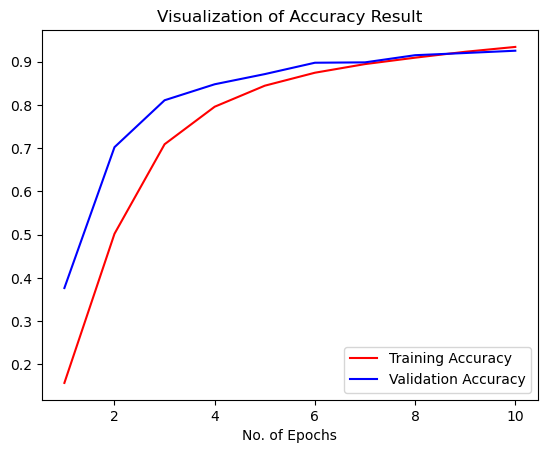

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,history_VGG_SGD.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history_VGG_SGD.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics

In [24]:
class_name = validation_set.class_names

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [26]:
y_pred = modelVGG.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 1090s 62ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [30]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [31]:
import sklearn.metrics

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.90      0.92       504
                                 Apple___Black_rot       0.95      0.98      0.96       497
                          Apple___Cedar_apple_rust       0.95      0.95      0.95       440
                                   Apple___healthy       0.93      0.95      0.94       502
                               Blueberry___healthy       0.94      0.96      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.96      0.97       421
                 Cherry_(including_sour)___healthy       0.94      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.86      0.88       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.85      0.94      0.

## Heatmap

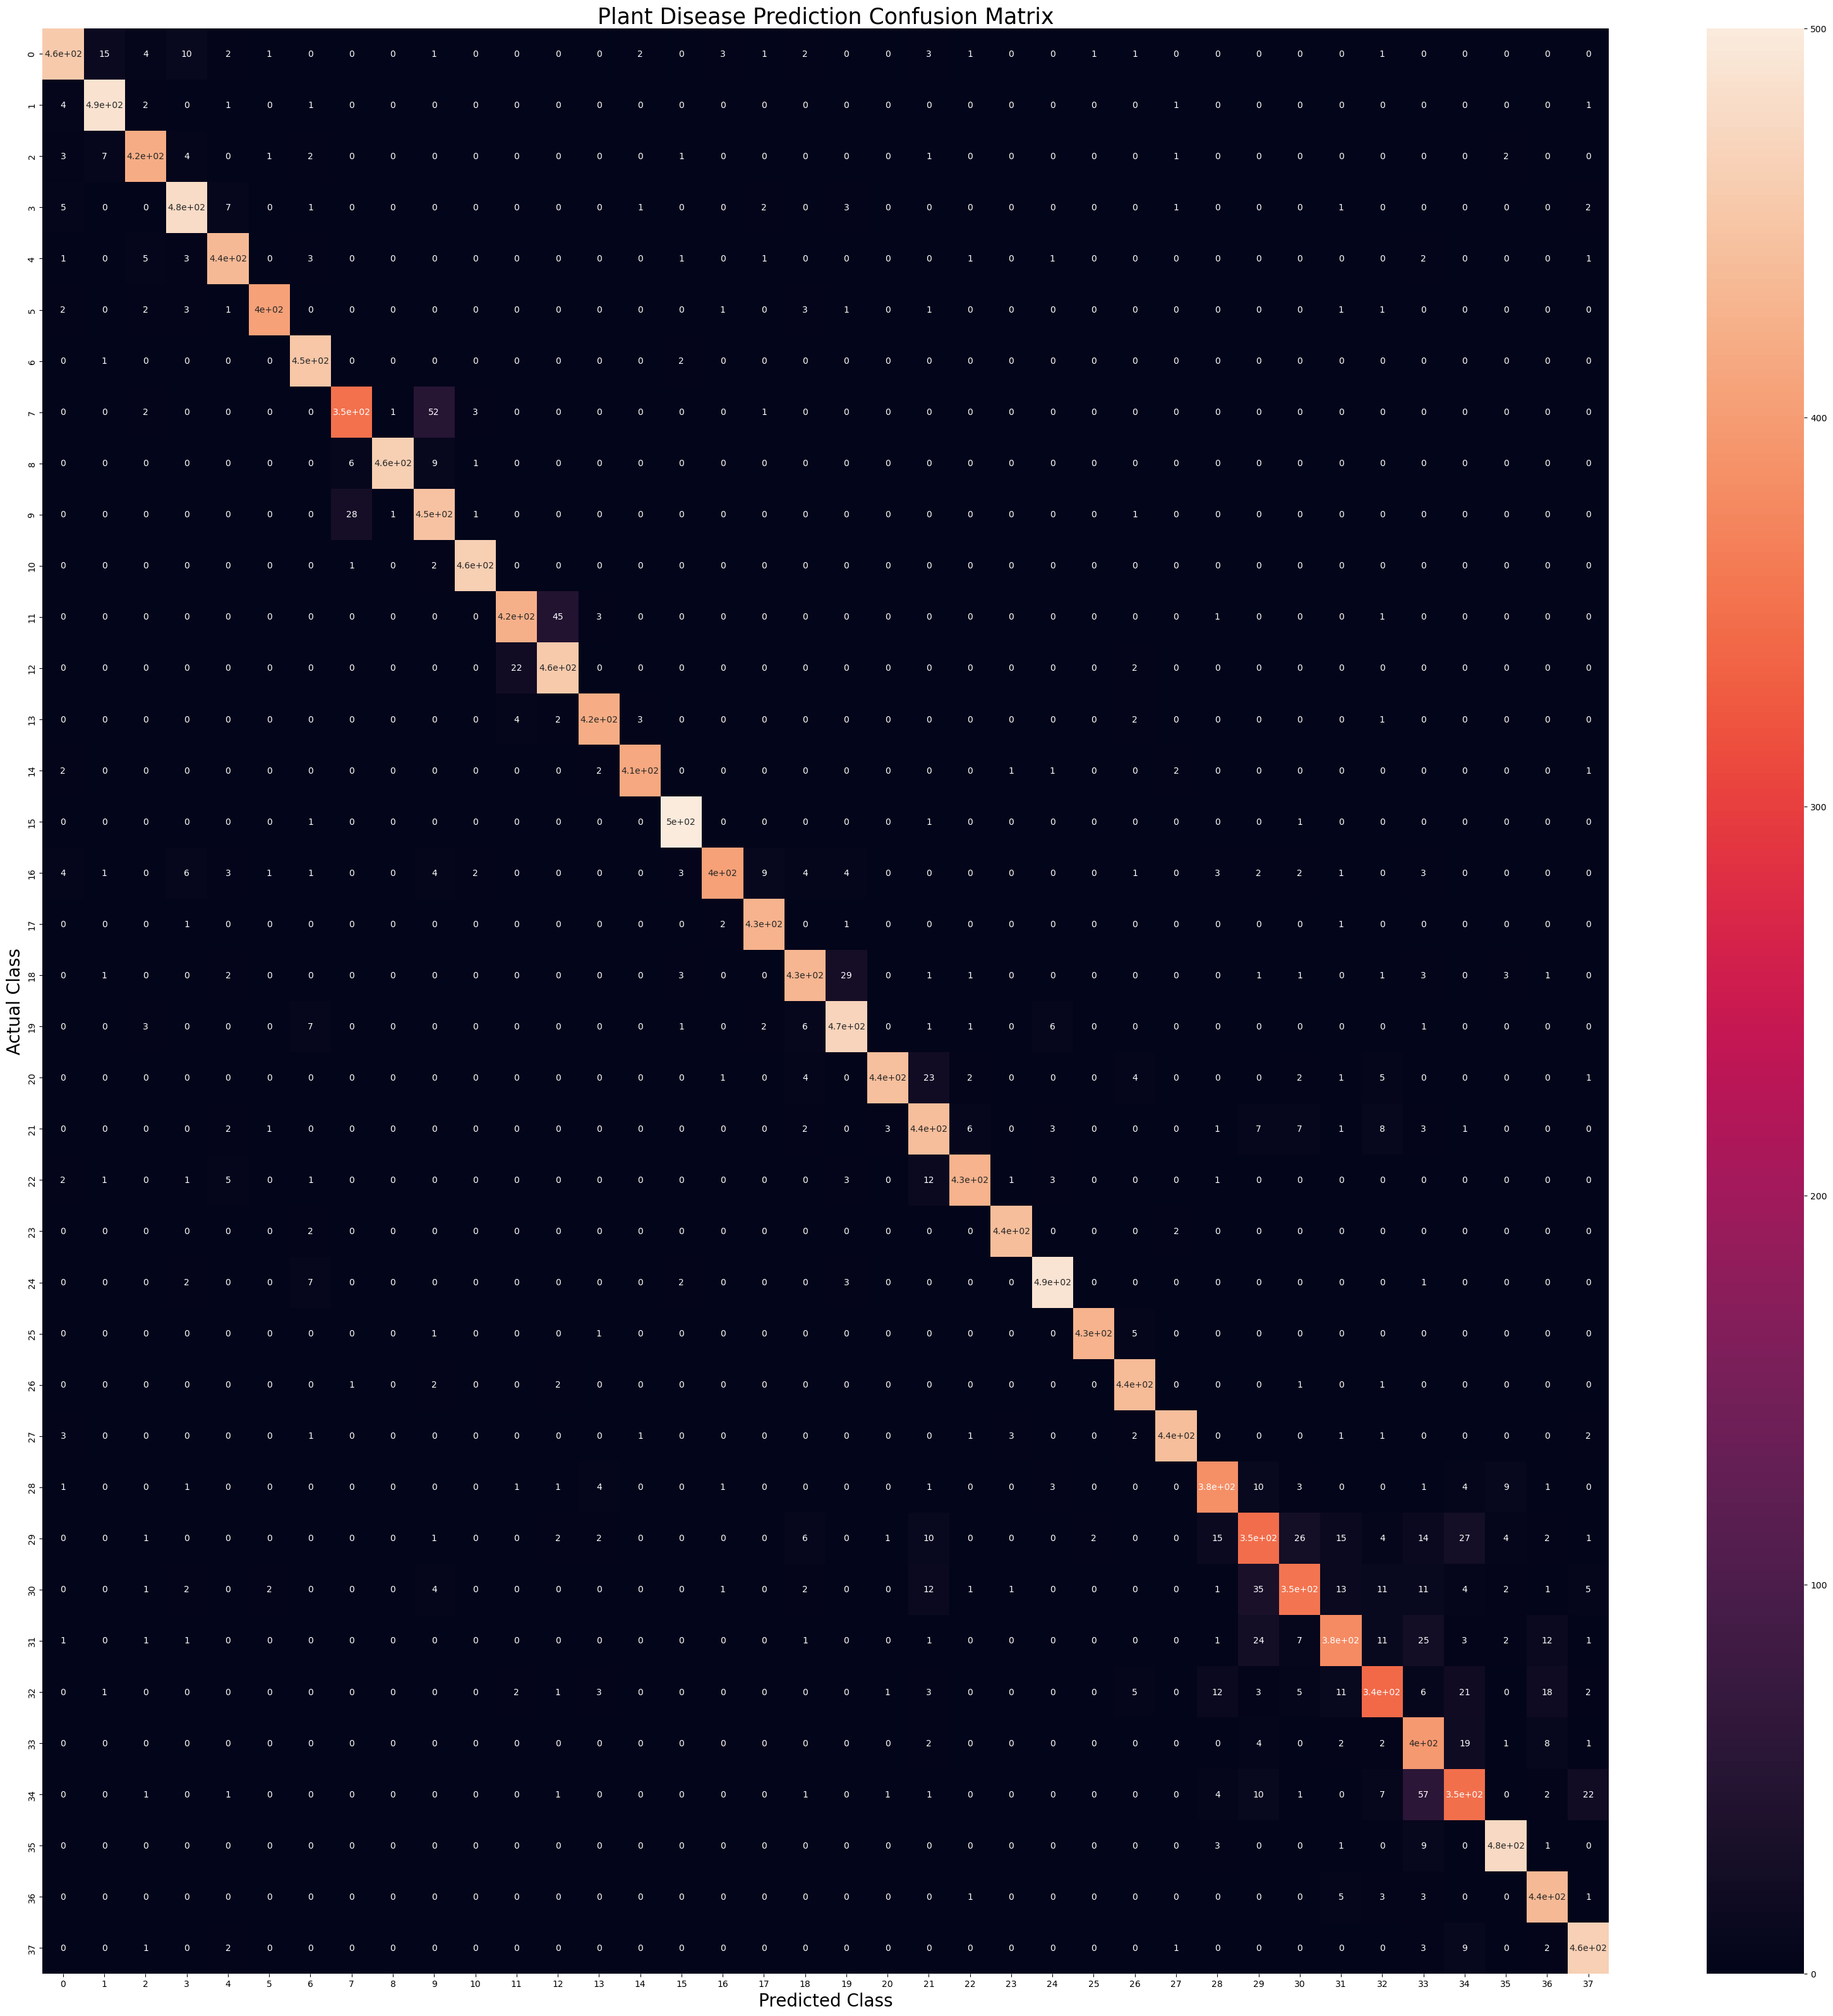

In [33]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()